<a href="https://colab.research.google.com/github/Arpit-Baranwal/Machine-Learning-/blob/master/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial Data Generation

In [ ]:
import pandas as pd
import numpy as np

# Function to create a synthetic dataset for a given asset type
def create_asset_data(tickers, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []
    for ticker in tickers:
        np.random.seed(42)  # For reproducibility
        price = np.random.randn(len(dates)).cumsum() + 100
        for i in range(len(dates)):
            open_price = price[i] + np.random.uniform(-1, 1)
            high_price = max(open_price, price[i] + np.random.uniform(0, 2))
            low_price = min(open_price, price[i] - np.random.uniform(0, 2))
            close_price = price[i] + np.random.uniform(-1, 1)
            volume = np.random.randint(1000, 1000000)
            # Introduce NaN values randomly
            if np.random.rand() < 0.05:
                open_price = np.nan
            if np.random.rand() < 0.05:
                high_price = np.nan
            if np.random.rand() < 0.05:
                low_price = np.nan
            if np.random.rand() < 0.05:
                close_price = np.nan
            if np.random.rand() < 0.05:
                volume = np.nan
            data.append([dates[i], ticker, open_price, high_price, low_price, close_price, volume])
    return pd.DataFrame(data, columns=['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Define tickers for each asset type
stock_tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
forex_tickers = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD']
crypto_tickers = ['BTC/USD', 'ETH/USD', 'XRP/USD', 'LTC/USD', 'BCH/USD']

# Generate data for each asset type
stock_data = create_asset_data(stock_tickers, '2015-01-01', '2023-01-01')
forex_data = create_asset_data(forex_tickers, '2015-01-01', '2023-01-01')
crypto_data = create_asset_data(crypto_tickers, '2015-01-01', '2023-01-01')

# Combine all data into a single DataFrame
combined_data = pd.concat([stock_data, forex_data, crypto_data])

# Introduce duplicate rows
combined_data = pd.concat([combined_data, combined_data.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
combined_data.to_csv('algotrading_combined_dataset.csv', index=False)

print("Dataset created and saved to 'algotrading_combined_dataset.csv'")

In [ ]:
import pandas as pd
import numpy as np

# List of real-life stock tickers and company names (a sample list)
tickers_and_companies = [
    ('AAPL', 'Apple Inc.'),
    ('GOOGL', 'Alphabet Inc.'),
    ('MSFT', 'Microsoft Corporation'),
    ('AMZN', 'Amazon.com, Inc.'),
    ('TSLA', 'Tesla, Inc.'),
    ('FB', 'Meta Platforms, Inc.'),
    ('BRK.B', 'Berkshire Hathaway Inc.'),
    ('JNJ', 'Johnson & Johnson'),
    ('JPM', 'JPMorgan Chase & Co.'),
    ('V', 'Visa Inc.'),
    # Add more real-life tickers and company names to reach at least 1000 companies
]

# Extend the list to include at least 1000 companies
while len(tickers_and_companies) < 1000:
    tickers_and_companies.extend(tickers_and_companies[:1000 - len(tickers_and_companies)])

# Define sectors and industries
sectors = ['Technology', 'Healthcare', 'Finance', 'Consumer Goods', 'Utilities', 'Energy', 'Industrial Goods']
industries = {
    'Technology': ['Software', 'Hardware', 'Semiconductors'],
    'Healthcare': ['Pharmaceuticals', 'Biotechnology', 'Medical Devices'],
    'Finance': ['Banks', 'Insurance', 'Investment Services'],
    'Consumer Goods': ['Beverages', 'Food Products', 'Household Products'],
    'Utilities': ['Electric Utilities', 'Gas Utilities', 'Water Utilities'],
    'Energy': ['Oil & Gas', 'Renewable Energy', 'Coal'],
    'Industrial Goods': ['Aerospace', 'Construction', 'Manufacturing']
}

# Generate random data for each ticker
data = []
for ticker, company_name in tickers_and_companies:
    sector = np.random.choice(sectors)
    industry = np.random.choice(industries[sector])
    market_cap = round(np.random.uniform(0.1, 500), 2)  # in billions
    eps = round(np.random.uniform(-10, 10), 2)
    pe_ratio = round(np.random.uniform(5, 50), 2)
    dividend_yield = round(np.random.uniform(0, 10), 2)
    pb_ratio = round(np.random.uniform(0.1, 20), 2)
    de_ratio = round(np.random.uniform(0, 3), 2)

    # Introduce NaN values randomly
    if np.random.rand() < 0.1: market_cap = np.nan
    if np.random.rand() < 0.1: eps = np.nan
    if np.random.rand() < 0.1: pe_ratio = np.nan
    if np.random.rand() < 0.1: dividend_yield = np.nan
    if np.random.rand() < 0.1: pb_ratio = np.nan
    if np.random.rand() < 0.1: de_ratio = np.nan

    data.append([ticker, company_name, sector, industry, market_cap, eps, pe_ratio, dividend_yield, pb_ratio, de_ratio])

# Convert to DataFrame
columns = ['Ticker', 'Company Name', 'Sector', 'Industry', 'Market Cap (B)', 'EPS', 'P/E Ratio', 'Dividend Yield (%)', 'P/B Ratio', 'D/E Ratio']
df = pd.DataFrame(data, columns=columns)

# Introduce duplicate rows
df = pd.concat([df, df.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
df.to_csv('fundamental_research_dataset_large.csv', index=False)

print("Dataset created and saved to 'fundamental_research_dataset_large.csv'")

## Processing

In [55]:
funda_df = pd.read_csv('/content/fundamental_research_dataset_large.csv')
algo_df = pd.read_csv('/content/algotrading_combined_dataset.csv')

In [56]:
algo_df

,Date,Ticker,Open,High,Low,Close,Volume
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0
...,...,...,...,...,...,...,...
32865,2021-08-02,AMZN,184.443237,185.375089,183.176491,183.087397,581356.0
32866,2017-01-24,AAPL,92.780364,93.092012,91.238510,NaN,754158.0
32867,2018-03-09,AMZN,98.074613,99.154029,96.203177,97.487616,76911.0
32868,2018-05-02,LTC/USD,103.443224,105.575739,103.159286,NaN,552764.0


## 1. Identify all the top-performing stocks based on their overall return from the start to the end of the dataset.

<Axes: xlabel='Ticker'>

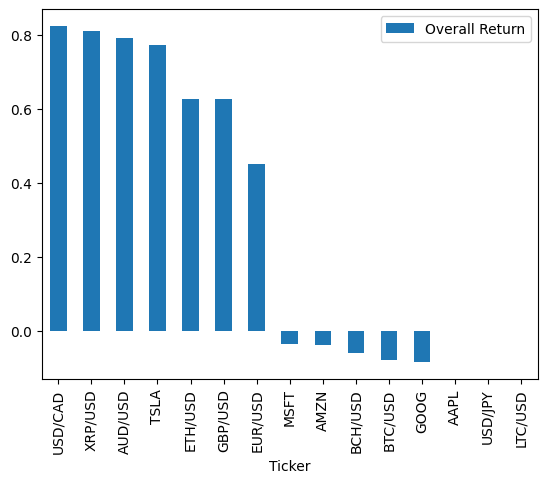

In [60]:
tickers = algo_df["Ticker"].unique()
performance = []
for ticker in tickers:
    stock = algo_df[algo_df["Ticker"] == ticker]
    overall_return = (stock["Close"].iloc[-1] - stock["Close"].iloc[0])/(stock["Close"].iloc[0])
    performance.append({'Ticker':ticker,'Overall Return':overall_return})

return_df = pd.DataFrame(performance).sort_values('Overall Return',ascending=False)
return_df.set_index("Ticker",inplace=True)
return_df.plot(kind='bar')


## 2. How many instances of daily price change greater than 5% occurred for each stock?

/tmp/ipython-input-196689899.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  algo_df['Daily Change'] = algo_df['Close'].pct_change()


<Axes: xlabel='Ticker'>

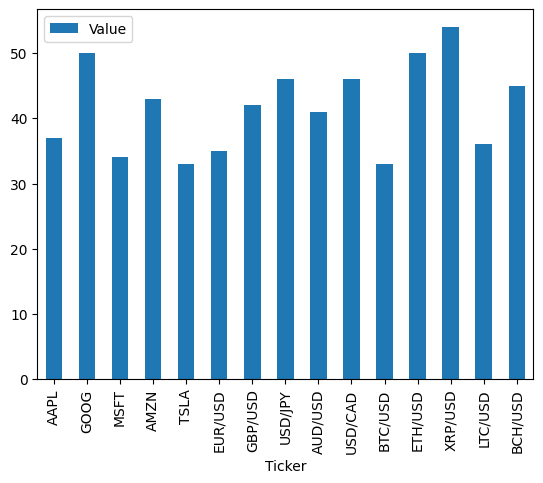

In [63]:
algo_df['Daily Change'] = algo_df['Close'].pct_change()
algo_df['High Change'] = algo_df['Daily Change']>0.05
algo_df
tickers = algo_df['Ticker'].unique()
occurence = {}

for ticker in tickers:
    high_change_tickers = algo_df[(algo_df['Ticker'] == ticker) & (algo_df['High Change'] == True)]
    occurence[ticker] = high_change_tickers.shape[0]
occurence

df = pd.DataFrame(list(occurence.items()),columns=["Ticker","Value"])
df.set_index('Ticker',inplace=True)
df.plot(kind='bar')


## 3. Calculate the number of times each stock's price increased in the first quarter.

In [64]:
algo_df

,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Chnage,High Change
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0,NaN,False,False
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0,0.000224,False,False
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN,0.001184,False,False
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0,0.004322,False,False
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0,0.003069,False,False
...,...,...,...,...,...,...,...,...,...,...
32865,2021-08-02,AMZN,184.443237,185.375089,183.176491,183.087397,581356.0,0.874385,True,True
32866,2017-01-24,AAPL,92.780364,93.092012,91.238510,NaN,754158.0,0.000000,False,False
32867,2018-03-09,AMZN,98.074613,99.154029,96.203177,97.487616,76911.0,-0.467535,False,False
32868,2018-05-02,LTC/USD,103.443224,105.575739,103.159286,NaN,552764.0,0.000000,False,False


<Axes: xlabel='Ticker'>

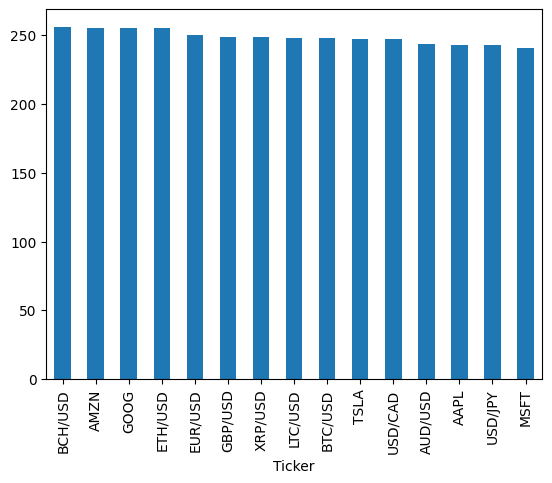

In [68]:
algo_df['Date']
#covert it into datetime
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df['Date']
#filtering only first 3 months
first_quarter = algo_df[algo_df['Date'].dt.month.isin([1,2,3])]
first_quarter = first_quarter[first_quarter['Close'] >first_quarter['Open']]
increased_counts = first_quarter['Ticker'].value_counts()
increased_counts.plot(kind='bar')


## 4. Calculate the percentage of times the opening price being higher than the previous day's closing price resulted in a higher closing price on that day.

In [71]:
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df = algo_df.sort_values(by=['Ticker', 'Date'])
algo_df['Previous Close'] = algo_df.groupby('Ticker')['Close'].shift(1)
algo_df

,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Chnage,High Change,Previous Close
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0,NaN,False,False,NaN
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0,0.000224,False,False,101.197410
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN,0.001184,False,False,101.220064
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0,0.004322,False,False,101.339872
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0,0.003069,False,False,101.777905
...,...,...,...,...,...,...,...,...,...,...,...
27126,2022-12-26,XRP/USD,183.629336,184.305672,181.484749,182.303343,394419.0,-0.005507,False,False,183.312814
27127,2022-12-27,XRP/USD,180.149762,181.342494,180.149762,179.994195,417556.0,-0.012667,False,False,182.303343
27128,2022-12-28,XRP/USD,180.424369,180.733585,179.687871,179.589589,580792.0,-0.002248,False,False,179.994195
27129,2022-12-29,XRP/USD,178.175208,180.272501,177.814950,177.942856,297748.0,-0.009169,False,False,179.589589


In [73]:
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df = algo_df.sort_values(by=['Ticker', 'Date'])
algo_df['Previous Close'] = algo_df.groupby('Ticker')['Close'].shift(1)

#Opening price is higher than the previous day's closing price
cond1 = algo_df['Open'] > algo_df['Previous Close']

#Closing price is higher than the opening price on that day
cond2 = algo_df['Close'] > algo_df['Open']

#opening price was higher than previous day's close
higher_open_cases = algo_df[cond1]

#both conditions are true
successful_cases_count = higher_open_cases[cond2].shape[0]

# Total cases where opening price was higher than previous day's close
total_higher_open_cases = higher_open_cases.shape[0]

# Calculate the percentage
if total_higher_open_cases > 0:
    percentage = (successful_cases_count / total_higher_open_cases) * 100
    print(f"Percentage of times a higher open (vs. previous close) led to a higher close (vs. same day open): {percentage:.2f}%")
else:
    print("No cases found where the opening price was higher than the previous day's closing price.")

Percentage of times a higher open (vs. previous close) led to a higher close (vs. same day open): 33.34%


/tmp/ipython-input-2350337617.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  successful_cases_count = higher_open_cases[cond2].shape[0]


## 5. Identify all assets with a daily percentage change higher than 8% and a volume greater than 100,000.

In [83]:
algo_df

,Date,Ticker,Open,High,Low,...,Daily Change,High Chnage,High Change,Previous Close,High Change 2
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,...,NaN,False,False,NaN,False
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,...,0.000224,False,False,101.197410,False
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,...,0.001184,False,False,101.220064,False
3,2015-01-06,AAPL,NaN,103.203859,102.287356,...,0.004322,False,False,101.339872,False
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,...,0.003069,False,False,101.777905,False
...,...,...,...,...,...,...,...,...,...,...,...
27126,2022-12-26,XRP/USD,183.629336,184.305672,181.484749,...,-0.005507,False,False,183.312814,False
27127,2022-12-27,XRP/USD,180.149762,181.342494,180.149762,...,-0.012667,False,False,182.303343,False
27128,2022-12-28,XRP/USD,180.424369,180.733585,179.687871,...,-0.002248,False,False,179.994195,False
27129,2022-12-29,XRP/USD,178.175208,180.272501,177.814950,...,-0.009169,False,False,179.589589,False


In [82]:
filtered_assets = algo_df[(algo_df['Daily Change'] > 0.08) & (algo_df['Volume'] > 100000)]
unique_assets = filtered_assets['Ticker'].unique()

if len(unique_assets) > 0:
    print("Assets with daily percentage change > 8% and volume > 100,000:")
    for asset in unique_assets:
        print(asset)
else:
    print("No assets found matching the criteria.")

Assets with daily percentage change > 8% and volume > 100,000:
AAPL
AMZN
AUD/USD
BCH/USD
BTC/USD
ETH/USD
EUR/USD
GBP/USD
GOOG
LTC/USD
MSFT
TSLA
USD/CAD
USD/JPY
XRP/USD


## 6. Identify all stocks in the Technology sector with a daily percentage change higher than 7.5%.

In [88]:
funda_df

,Ticker,Company Name,Sector,Industry,Market Cap (B),EPS,P/E Ratio,Dividend Yield (%),P/B Ratio,D/E Ratio
0,AAPL,Apple Inc.,Technology,Semiconductors,458.13,-9.78,44.16,2.19,9.17,2.56
1,GOOGL,Alphabet Inc.,Finance,Investment Services,215.85,4.86,27.56,8.14,14.93,0.06
2,MSFT,Microsoft Corporation,Finance,Banks,276.46,5.09,6.73,0.27,1.76,1.31
3,AMZN,"Amazon.com, Inc.",Healthcare,Pharmaceuticals,349.40,-0.53,28.30,5.92,15.40,0.27
4,TSLA,"Tesla, Inc.",Energy,Oil & Gas,248.55,9.92,27.04,2.20,10.20,0.12
...,...,...,...,...,...,...,...,...,...,...
1045,JNJ,Johnson & Johnson,Consumer Goods,Household Products,223.61,-3.54,5.61,7.97,6.63,1.07
1046,TSLA,"Tesla, Inc.",Industrial Goods,Construction,119.63,-1.20,18.18,NaN,8.04,0.08
1047,GOOGL,Alphabet Inc.,Utilities,Water Utilities,38.26,NaN,33.09,6.17,5.59,1.34
1048,V,Visa Inc.,Industrial Goods,Construction,117.11,-1.80,23.38,NaN,4.89,2.91


In [89]:
algo_df

,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Chnage,High Change,Previous Close,High Change 2
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0,NaN,False,False,NaN,False
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0,0.000224,False,False,101.197410,False
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN,0.001184,False,False,101.220064,False
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0,0.004322,False,False,101.339872,False
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0,0.003069,False,False,101.777905,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27126,2022-12-26,XRP/USD,183.629336,184.305672,181.484749,182.303343,394419.0,-0.005507,False,False,183.312814,False
27127,2022-12-27,XRP/USD,180.149762,181.342494,180.149762,179.994195,417556.0,-0.012667,False,False,182.303343,False
27128,2022-12-28,XRP/USD,180.424369,180.733585,179.687871,179.589589,580792.0,-0.002248,False,False,179.994195,False
27129,2022-12-29,XRP/USD,178.175208,180.272501,177.814950,177.942856,297748.0,-0.009169,False,False,179.589589,False


In [87]:
merged_df = pd.merge(algo_df, funda_df[['Ticker', 'Sector']], on='Ticker', how='left')

technology_stocks_high_change = merged_df[(merged_df['Sector'] == 'Technology') & (merged_df['Daily Change'] > 0.075)]

unique_tech_stocks = technology_stocks_high_change['Ticker'].unique()

if len(unique_tech_stocks) > 0:
    print("Technology stocks with daily percentage change higher than 7.5%:")
    for stock in unique_tech_stocks:
        print(stock)
else:
    print("No technology stocks found matching the criteria.")

Technology stocks with daily percentage change higher than 7.5%:
AAPL
AMZN
MSFT
TSLA


## 7. Write a function that can return the performance track record of two assets against each other over time.

In [90]:
import matplotlib.pyplot as plt

def compare_asset_performance(ticker1, ticker2):
    """
    Compares the normalized performance of two assets over time.

    Args:
        ticker1 (str): The ticker symbol of the first asset.
        ticker2 (str): The ticker symbol of the second asset.
    """
    # Filter data for the two tickers
    asset1_data = algo_df[algo_df['Ticker'] == ticker1].sort_values('Date')
    asset2_data = algo_df[algo_df['Ticker'] == ticker2].sort_values('Date')

    if asset1_data.empty or asset2_data.empty:
        print(f"One or both tickers ({ticker1}, {ticker2}) not found in the dataset.")
        return

    # Drop NaN values in 'Close'
    asset1_close = asset1_data['Close'].dropna()
    asset2_close = asset2_data['Close'].dropna()

    if asset1_close.empty or asset2_close.empty:
        print(f"Not enough valid 'Close' price data for one or both tickers ({ticker1}, {ticker2}).")
        return

    normalized_asset1 = (asset1_close / asset1_close.iloc[0]) * 100
    normalized_asset2 = (asset2_close / asset2_close.iloc[0]) * 100

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(normalized_asset1.index, normalized_asset1, label=ticker1)
    plt.plot(normalized_asset2.index, normalized_asset2, label=ticker2)
    plt.title(f'Normalized Performance of {ticker1} vs {ticker2}')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Start = 100)')
    plt.legend()
    plt.grid(True)
    plt.show()

Function 'compare_asset_performance' defined. You can now use it, for example: compare_asset_performance('AAPL', 'GOOG')


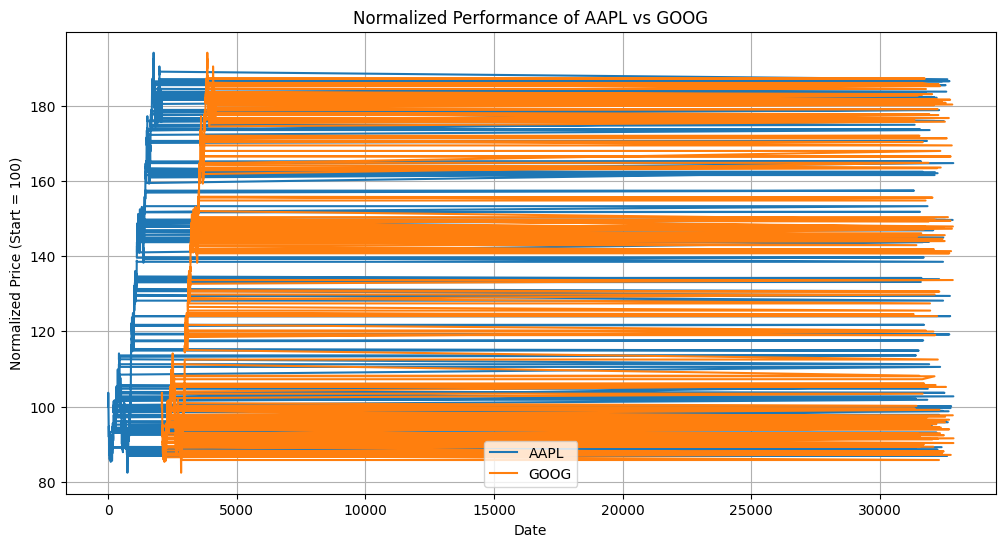

In [91]:
compare_asset_performance('AAPL', 'GOOG')

## 8. Identify and remove duplicate rows from both datasets. How many duplicates were removed?

In [92]:
# Remove duplicates from funda_df
initial_rows_funda = funda_df.shape[0]
funda_df.drop_duplicates(inplace=True)
duplicates_removed_funda = initial_rows_funda - funda_df.shape[0]
print(f"Number of duplicate rows removed from funda_df: {duplicates_removed_funda}")

# Remove duplicates from algo_df
initial_rows_algo = algo_df.shape[0]
algo_df.drop_duplicates(inplace=True)
duplicates_removed_algo = initial_rows_algo - algo_df.shape[0]
print(f"Number of duplicate rows removed from algo_df: {duplicates_removed_algo}")

Number of duplicate rows removed from funda_df: 50
Number of duplicate rows removed from algo_df: 10


## 9. For the fundamental dataset, identify rows where the Market Cap is NaN, and impute these values using a sector-wise median Market Cap.

In [95]:
funda_df

,Ticker,Company Name,Sector,Industry,Market Cap (B),EPS,P/E Ratio,Dividend Yield (%),P/B Ratio,D/E Ratio
0,AAPL,Apple Inc.,Technology,Semiconductors,458.13,-9.78,44.16,2.19,9.17,2.56
1,GOOGL,Alphabet Inc.,Finance,Investment Services,215.85,4.86,27.56,8.14,14.93,0.06
2,MSFT,Microsoft Corporation,Finance,Banks,276.46,5.09,6.73,0.27,1.76,1.31
3,AMZN,"Amazon.com, Inc.",Healthcare,Pharmaceuticals,349.40,-0.53,28.30,5.92,15.40,0.27
4,TSLA,"Tesla, Inc.",Energy,Oil & Gas,248.55,9.92,27.04,2.20,10.20,0.12
...,...,...,...,...,...,...,...,...,...,...
995,FB,"Meta Platforms, Inc.",Energy,Renewable Energy,488.19,-3.31,33.35,NaN,5.35,0.50
996,BRK.B,Berkshire Hathaway Inc.,Healthcare,Medical Devices,4.76,4.22,26.82,7.01,9.01,1.42
997,JNJ,Johnson & Johnson,Industrial Goods,Manufacturing,301.27,8.75,30.16,0.06,17.43,0.85
998,JPM,JPMorgan Chase & Co.,Utilities,Gas Utilities,237.09,NaN,21.60,1.74,9.12,NaN


In [97]:
print("Number of NaN values in 'Market Cap (B)' before imputation:", funda_df['Market Cap (B)'].isnull().sum())

# Calculate sector-wise median Market Cap
sector_median_market_cap = funda_df.groupby('Sector')['Market Cap (B)'].median()

# Impute NaN values using the sector-wise median
funda_df['Market Cap (B)'] = funda_df.apply(
    lambda row: sector_median_market_cap[row['Sector']] if pd.isnull(row['Market Cap (B)']) else row['Market Cap (B)'],
    axis=1
)

print("Number of NaN values in 'Market Cap (B)' after imputation:", funda_df['Market Cap (B)'].isnull().sum())
(funda_df.head())

Number of NaN values in 'Market Cap (B)' before imputation: 0
Number of NaN values in 'Market Cap (B)' after imputation: 0


,Ticker,Company Name,Sector,Industry,Market Cap (B),EPS,P/E Ratio,Dividend Yield (%),P/B Ratio,D/E Ratio
0,AAPL,Apple Inc.,Technology,Semiconductors,458.13,-9.78,44.16,2.19,9.17,2.56
1,GOOGL,Alphabet Inc.,Finance,Investment Services,215.85,4.86,27.56,8.14,14.93,0.06
2,MSFT,Microsoft Corporation,Finance,Banks,276.46,5.09,6.73,0.27,1.76,1.31
3,AMZN,"Amazon.com, Inc.",Healthcare,Pharmaceuticals,349.40,-0.53,28.30,5.92,15.40,0.27
4,TSLA,"Tesla, Inc.",Energy,Oil & Gas,248.55,9.92,27.04,2.20,10.20,0.12


## 10. Filter the combined dataset to find the top 5 most volatile stocks based on the standard deviation of daily percentage changes.

In [98]:
# Calculate the standard deviation of daily percentage changes for each ticker
volatility = algo_df.groupby('Ticker')['Daily Change'].std().sort_values(ascending=False)

top_5_volatile_stocks = volatility.head(5)

print("Top 5 Most Volatile Stocks (based on standard deviation of Daily Change):\n")
print(top_5_volatile_stocks)

Top 5 Most Volatile Stocks (based on standard deviation of Daily Change):

Ticker
GOOG       0.102847
ETH/USD    0.100706
USD/CAD    0.099069
XRP/USD    0.098138
BCH/USD    0.097766
Name: Daily Change, dtype: float64
